# Deep Neural Networks

1. Turn your classifier into deep network
2. Use the optimizer to compute gradients
3. Understand regularization


## 1. Rectified Linear Units (ReLUs)

Insert `H` number of ReLUs between two linear functions

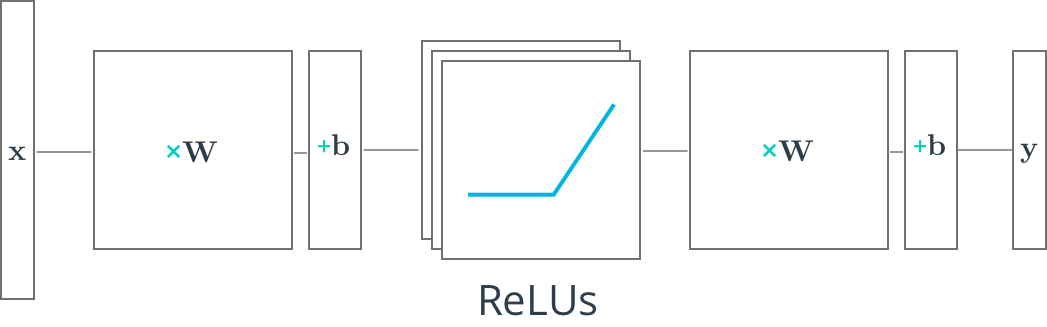

## 2. Multilayer Neural Networks

In this lesson, you'll learn how to build multilayer neural networks with TensorFlow. Adding a hidden layer to a network allows it to model more complex functions. Also, using a non-linear activation function on the hidden layer lets it model non-linear functions.

Next, you'll see how a ReLU hidden layer is implemented in TensorFlow.

   **Note**: Depicted above is a "2-layer" neural network:

   1. The first layer effectively consists of the set of weights and biases applied to X and passed through ReLUs. The output of this layer is fed to the next one, but is not observable outside the network, hence it is known as a **hidden layer**.
    
   2. The second layer consists of the weights and biases applied to these intermediate outputs, followed by the softmax function to generate probabilities. 
   
   
## 3. Quiz: TensorFlow ReLU

A Rectified linear unit (ReLU) is type of [activation function](https://en.wikipedia.org/wiki/Activation_function) that is defined as `f(x) = max(0, x)`. The function returns `0` if `x` is negative, otherwise it returns `x`. TensorFlow provides the ReLU function as `tf.nn.relu()`, as shown below.

```python
# Hidden Layer with ReLU activation function
hidden_layer = tf.add(tf.matmul(features, hidden_weights), hidden_biases)
hidden_layer = tf.nn.relu(hidden_layer)

output = tf.add(tf.matmul(hidden_layer, output_weights), output_biases)

```

The above code applies the `tf.nn.relu()` function to the `hidden_layer`, effectively turning off any negative weights and acting like an on/off switch. Adding additional layers, like the `output layer`, after an activation function turns the model into a nonlinear function. This nonlinearity allows the network to solve more complex problems.

### Quiz

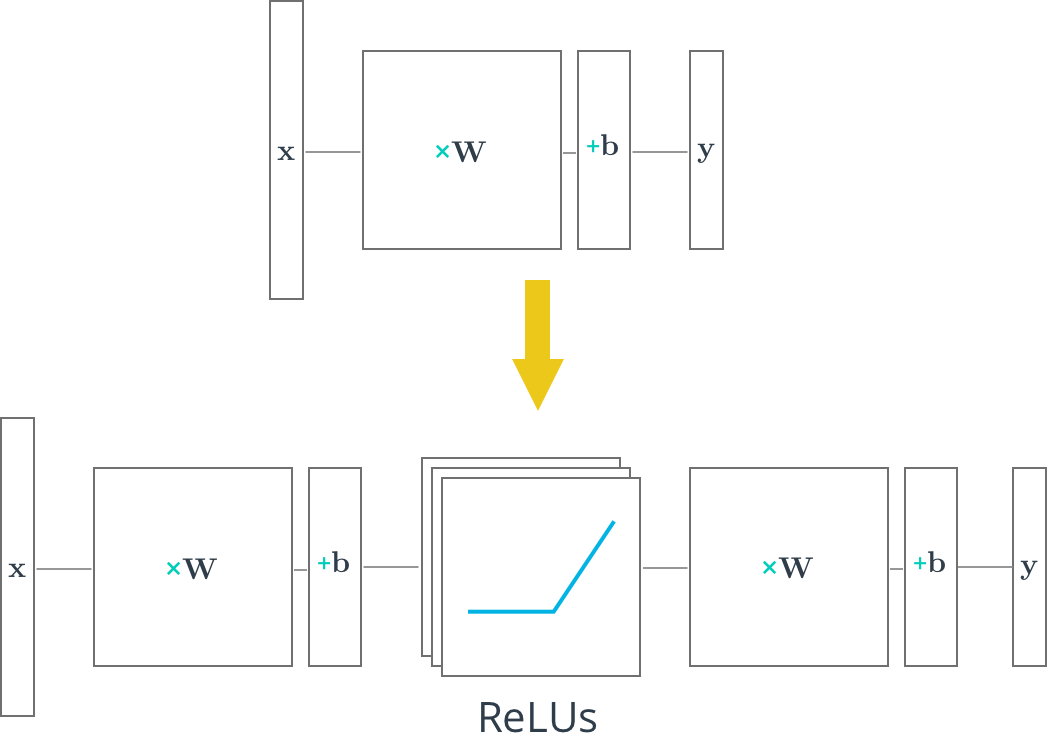

In this quiz, you'll use TensorFlow's ReLU function to turn the linear model below into a nonlinear model.


In [1]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

output = None
hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[1.0, 2.0, 3.0, 4.0], [-1.0, -2.0, -3.0, -4.0], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model
hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

# TODO: save and print session results on variable output
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(logits)
    print(output)


Instructions for updating:
Colocations handled automatically by placer.
[[ 5.11      8.440001]
 [ 0.        0.      ]
 [24.010002 38.239998]]


## 4. The Chain Rule

Compute the derivative using the derivatives of each step

## 5. Back Prop

Back prop usually takes 2X the memory needed by forward prop


## 6. Deep Neural Network in TensorFlow

You've seen how to build a logistic classifier using TensorFlow. Now you're going to see how to use the logistic classifier to build a deep neural network.

### Step by Step

In the following walkthrough, we'll step through TensorFlow code written to classify the letters in the MNIST database. If you would like to run the network on your computer, the file is provided [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58a61a3a_multilayer-perceptron/multilayer-perceptron.zip). You can find this and many more examples of TensorFlow at [Aymeric Damien's GitHub repository](https://github.com/aymericdamien/TensorFlow-Examples).

### Code

### TensorFlow MNIST

```python
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

```

You'll use the MNIST dataset provided by TensorFlow, which batches and One-Hot encodes the data for you.

### Learning Parameters

```python
import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

```

The focus here is on the architecture of multilayer neural networks, not parameter tuning, so here we'll just give you the learning parameters.

### Hidden Layer Parameters

```python
n_hidden_layer = 256 # layer number of features

```

The variable `n_hidden_layer` determines the size of the hidden layer in the neural network. This is also known as the width of a layer.

### Weights and Biases

```python
# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

```

Deep neural networks use multiple layers with each layer requiring it's own weight and bias. The `'hidden_layer'` weight and bias is for the hidden layer. The `'out'` weight and bias is for the output layer. If the neural network were deeper, there would be weights and biases for each additional layer.

### Input

```python
# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

```

The MNIST data is made up of 28px by 28px images with a single channel. The `tf.reshape()` function above reshapes the 28px by 28px matrices in `x` into row vectors of 784px.

### Multilayer Perceptron

![multi-layer.png](attachment:multi-layer.png)

```python
# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']),\
    biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

```

You've seen the linear function `tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])` before, also known as `xw + b`. Combining linear functions together using a ReLU will give you a two layer network.

### Optimizer

```python
# Define loss and optimizer
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

```

This is the same optimization technique used in the Intro to TensorFLow lab.

### Session

```python
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

```

The MNIST library in TensorFlow provides the ability to receive the dataset in batches. Calling the `mnist.train.next_batch()` function returns a subset of the training data.



## 7. Deeper Neural Network

![layers.png](attachment:layers.png)

That's it! Going from one layer to two is easy. Adding more layers to the network allows you to solve more complicated problems.


## 8. Save and Restore TensorFlow Models

Training a model can take hours. But once you close your TensorFlow session, you lose all the trained weights and biases. If you were to reuse the model in the future, you would have to train it all over again!

Fortunately, TensorFlow gives you the ability to save your progress using a class called `tf.train.Saver`. This class provides the functionality to save any `tf.Variable` to your file system.

### a) Saving Variables

Let's start with a simple example of saving `weights` and `bias` Tensors. For the first example you'll just save two variables. Later examples will save all the weights in a practical model.

```python
import tensorflow as tf

# The file path to save the data
save_file = './model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Initialize all the Variables
    sess.run(tf.global_variables_initializer())

    # Show the values of weights and bias
    print('Weights:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))

    # Save the model
    saver.save(sess, save_file)
   
```


> Weights:

> [[-0.97990924 1.03016174 0.74119264]

> [-0.82581609 -0.07361362 -0.86653847]]

> Bias:

> [ 1.62978125 -0.37812829 0.64723819]

The Tensors `weights` and `bias` are set to random values using the `tf.truncated_normal()` function. The values are then saved to the `save_file` location, "model.ckpt", using the `tf.train.Saver.save()` function. (The ".ckpt" extension stands for "checkpoint".)

If you're using TensorFlow 0.11.0RC1 or newer, a file called "model.ckpt.meta" will also be created. This file contains the TensorFlow graph.

### b) Loading Variables

Now that the Tensor Variables are saved, let's load them back into a new model.

```python
# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)

    # Show the values of weights and bias
    print('Weight:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))
    
```

> Weights:

> [[-0.97990924 1.03016174 0.74119264]

> [-0.82581609 -0.07361362 -0.86653847]]

> Bias:

> [ 1.62978125 -0.37812829 0.64723819]

You'll notice you still need to create the `weights` and `bias` Tensors in Python. The `tf.train.Saver.restore()` function loads the saved data into `weights` and `bias`.

Since `tf.train.Saver.restore()` sets all the TensorFlow Variables, you don't need to call `tf.global_variables_initializer()`.

### c) Save a Trained Model
Let's see how to train a model and save its weights.

First start with a model:

```python
# Remove previous Tensors and Operations
tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('.', one_hot=True)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

```

Let's train that model, then save the weights:

```python
import math

save_file = './train_model.ckpt'
batch_size = 128
n_epochs = 100

saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(n_epochs):
        total_batch = math.ceil(mnist.train.num_examples / batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_features, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(
                optimizer,
                feed_dict={features: batch_features, labels: batch_labels})

        # Print status for every 10 epochs
        if epoch % 10 == 0:
            valid_accuracy = sess.run(
                accuracy,
                feed_dict={
                    features: mnist.validation.images,
                    labels: mnist.validation.labels})
            print('Epoch {:<3} - Validation Accuracy: {}'.format(
                epoch,
                valid_accuracy))

    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')
    
```

> Epoch 0 - Validation Accuracy: 0.06859999895095825

> Epoch 10 - Validation Accuracy: 0.20239999890327454

> Epoch 20 - Validation Accuracy: 0.36980000138282776

> Epoch 30 - Validation Accuracy: 0.48820000886917114

> Epoch 40 - Validation Accuracy: 0.5601999759674072

> Epoch 50 - Validation Accuracy: 0.6097999811172485

> Epoch 60 - Validation Accuracy: 0.6425999999046326

> Epoch 70 - Validation Accuracy: 0.6733999848365784

> Epoch 80 - Validation Accuracy: 0.6916000247001648

> Epoch 90 - Validation Accuracy: 0.7113999724388123

> Trained Model Saved.

### d) Load a Trained Model

Let's load the weights and bias from memory, then check the test accuracy.

```python
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: mnist.test.images, labels: mnist.test.labels})

print('Test Accuracy: {}'.format(test_accuracy))

```

> Test Accuracy: 0.7229999899864197

That's it! You now know how to save and load a trained model in TensorFlow. Let's look at loading weights and biases into modified models in the next section. 


## 9. Loading the Weights and Biases into a New Model

Sometimes you might want to adjust, or "finetune" a model that you have already trained and saved.

However, loading saved Variables directly into a modified model can generate errors. Let's go over how to avoid these problems.

### a) Naming Error

TensorFlow uses a string identifier for Tensors and Operations called `name`. If a name is not given, TensorFlow will create one automatically. TensorFlow will give the first node the name `<Type>`, and then give the name `<Type>_<number>` for the subsequent nodes. Let's see how this can affect loading a model with a different order of `weights` and `bias`: 

```python
import tensorflow as tf

# Remove the previous weights and bias
tf.reset_default_graph()

save_file = 'model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)

# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
bias = tf.Variable(tf.truncated_normal([3]))
weights = tf.Variable(tf.truncated_normal([2, 3]))

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    # Load the weights and bias - ERROR
    saver.restore(sess, save_file)
    
```

The code above prints out the following:

> Save Weights: Variable:0

> Save Bias: Variable_1:0

> Load Weights: Variable_1:0

> Load Bias: Variable:0

> ...

> InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match.

> ...

You'll notice that the `name` properties for `weights` and `bias` are different than when you saved the model. This is why the code produces the "Assign requires shapes of both tensors to match" error. The code `saver.restore(sess, save_file)` is trying to load weight data into `bias` and bias data into `weights`.

Instead of letting TensorFlow set the name property, let's set it manually:

```python
import tensorflow as tf

tf.reset_default_graph()

save_file = 'model.ckpt'

# Two Tensor Variables: weights and bias
weights = tf.Variable(tf.truncated_normal([2, 3]), name='weights_0')
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)

# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')
weights = tf.Variable(tf.truncated_normal([2, 3]) ,name='weights_0')

saver = tf.train.Saver()

# Print the name of Weights and Bias
print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    # Load the weights and bias - No Error
    saver.restore(sess, save_file)

print('Loaded Weights and Bias successfully.')

```

> Save Weights: weights_0:0

> Save Bias: bias_0:0

> Load Weights: weights_0:0

> Load Bias: bias_0:0

> Loaded Weights and Bias successfully.

That worked! The Tensor names match and the data loaded correctly.

## 10. Regularization

1. Early Termination(Best Way)
2. L2 Regularization

## 11. [TensorFlow Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout)

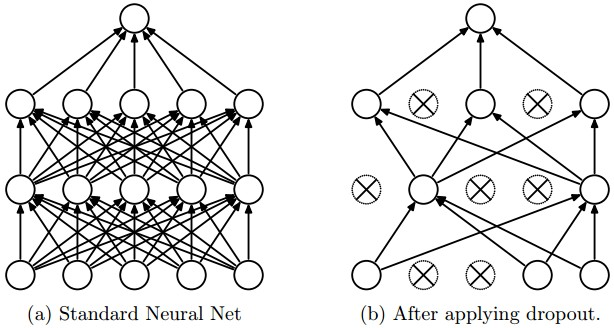

Dropout is a regularization technique for reducing overfitting. The technique temporarily drops units ([artificial neurons](https://en.wikipedia.org/wiki/Artificial_neuron)) from the network, along with all of those units' incoming and outgoing connections. Figure 1 illustrates how dropout works.

TensorFlow provides the `tf.nn.dropout()` function, which you can use to implement dropout.

Let's look at an example of how to use `tf.nn.dropout()`.

```python
keep_prob = tf.placeholder(tf.float32) # probability to keep units

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

```

The code above illustrates how to apply dropout to a neural network.

The `tf.nn.dropout()` function takes in two parameters:

1. `hidden_layer`: the tensor to which you would like to apply dropout
2. `keep_prob`: the probability of keeping (i.e. not dropping) any given unit

`keep_prob` allows you to adjust the number of units to drop. In order to compensate for dropped units, `tf.nn.dropout()` multiplies all units that are kept (i.e. not dropped) by `1/keep_prob`.

During training, a good starting value for `keep_prob` is `0.5`.

During testing, use a `keep_prob` value of `1.0` to keep all units and maximize the power of the model.

### Quiz 1

Take a look at the code snippet below. Do you see what's wrong?

There's nothing wrong with the syntax, however the test accuracy is extremely low.

```python
...

keep_prob = tf.placeholder(tf.float32) # probability to keep units

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

...

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(epochs):
        for batch_i in range(batches):
            ....

            sess.run(optimizer, feed_dict={
                features: batch_features,
                labels: batch_labels,
                keep_prob: 0.5})

    validation_accuracy = sess.run(accuracy, feed_dict={
        features: test_features,
        labels: test_labels,
        keep_prob: 0.5})
    
```

What's wrong with the above code?

> `keep_prob` should be set to 1.0 when evaluating validation accuracy

That's correct! You should only drop units while training the model. During validation or testing, you should keep all of the units to maximize accuracy.

### Quiz 2

This quiz will be starting with the code from the ReLU Quiz and applying a dropout layer. Build a model with a ReLU layer and dropout layer using the `keep_prob` placeholder to pass in a probability of `0.5`. Print the logits from the model.

Note: Output will be different every time the code is run. This is caused by dropout randomizing the units it drops.


In [2]:
# Solution is available in the other "solution.py"
import tensorflow as tf
from test import *
tf.set_random_seed(123456)


hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# set random seed
tf.set_random_seed(123456)

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[0.0, 2.0, 3.0, 4.0], [0.1, 0.2, 0.3, 0.4], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model with Dropout
keep_prob = tf.placeholder(tf.float32)
rate = 1 - keep_prob
hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)
# hidden_layer = tf.nn.dropout(hidden_layer, keep_prob=None, noise_shape=None, 
#                              seed=None, name=None, rate=rate)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

# TODO: save and print session results as variable named "output"
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(logits, feed_dict={keep_prob: 0.5})
    print(output)
    

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[[ 2.98        7.5400004 ]
 [ 0.19600002  0.09800001]
 [ 4.72       28.32      ]]
